In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [3]:
df0 = pd.read_csv(r'C:\Users\dell\Downloads\CELLONE.csv')
df1 = pd.read_csv(r'C:\Users\dell\Downloads\jio.csv')
df2 = pd.read_csv(r'C:\Users\dell\Downloads\airtel.csv')

In [4]:
df2.shape

(351230, 8)

In [5]:
df2.head()

,operator,technology,download,speed_kbps,signal_strength,lsa,month,year
0,AIRTEL,4G,download,34840,-99,Rajasthan,2,2024
1,AIRTEL,4G,download,16982,-106,Rajasthan,2,2024
2,AIRTEL,4G,upload,1350,-105,Rajasthan,2,2024
3,AIRTEL,4G,upload,10456,-94,Rajasthan,2,2024
4,AIRTEL,4G,download,3611,-109,Rajasthan,2,2024


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351230 entries, 0 to 351229
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   operator         351230 non-null  object
 1   technology       351230 non-null  object
 2   download         351230 non-null  object
 3   speed_kbps       351230 non-null  int64 
 4   signal_strength  351230 non-null  object
 5   lsa              351230 non-null  object
 6   month            351230 non-null  int64 
 7   year             351230 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 21.4+ MB


In [7]:
combined_all = pd.concat([df0, df1, df2], ignore_index=True)

In [8]:
combined_all.tail(20)

,operator,technology,download,speed_kbps,signal_strength,lsa,month,year
1550910,AIRTEL,4G,download,10145,-99,Rajasthan,12,2018
1550911,AIRTEL,4G,upload,591,-101,Rajasthan,12,2018
1550912,AIRTEL,4G,upload,2498,-87,Rajasthan,12,2018
1550913,AIRTEL,4G,download,1639,-73,Rajasthan,12,2018
1550914,AIRTEL,4G,upload,790,-71,Rajasthan,12,2018
1550915,AIRTEL,4G,download,3834,-100,Rajasthan,12,2018
1550916,AIRTEL,4G,upload,346,-110,Rajasthan,12,2018
1550917,AIRTEL,4G,upload,1330,-107,Rajasthan,12,2018
1550918,AIRTEL,4G,upload,106,-97,Rajasthan,12,2018
1550919,AIRTEL,4G,upload,283,-93,Rajasthan,12,2018


In [10]:
non_integers = combined_all[~combined_all['signal_strength'].apply(lambda x: isinstance(x, int))]
print(non_integers)

        operator technology  download  speed_kbps signal_strength        lsa  \
0        CELLONE         4G    upload        4080              na  Rajasthan   
1        CELLONE         3G  download          20             -99  Rajasthan   
2        CELLONE         3G    upload         197             -73  Rajasthan   
3        CELLONE         3G  download        5890             -61  Rajasthan   
4        CELLONE         3G    upload         311             -63  Rajasthan   
...          ...        ...       ...         ...             ...        ...   
1550925   AIRTEL         3G  download        1005             -85  Rajasthan   
1550926   AIRTEL         3G  download         477             -71  Rajasthan   
1550927   AIRTEL         3G    upload         470             -63  Rajasthan   
1550928   AIRTEL         3G    upload         725             -59  Rajasthan   
1550929   AIRTEL         4G  download        5205             -98  Rajasthan   

         month  year  
0            4  

In [11]:
combined_all['signal_strength'].replace(['na', 'NA'], np.nan, inplace=True)

combined_all['signal_strength'] = pd.to_numeric(combined_all['signal_strength'], errors='coerce')

combined_all['signal_strength'].fillna(0, inplace=True)

combined_all['signal_strength'] = combined_all['signal_strength'].astype('int64')

print(combined_all['signal_strength'].head())
print(combined_all.dtypes)

0     0
1   -99
2   -73
3   -61
4   -63
Name: signal_strength, dtype: int64
operator           object
technology         object
download           object
speed_kbps          int64
signal_strength     int64
lsa                object
month               int64
year                int64
dtype: object


### Q1: How has the average network speed and signal strength changed from 2018 to 2024 for each telecom company? ###

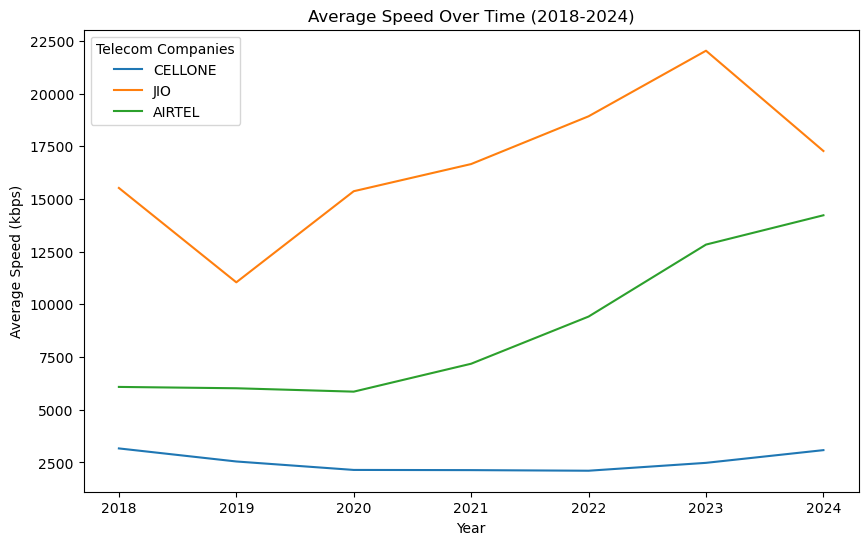

In [12]:
grouped_data = combined_all.groupby(['operator', 'year'])['speed_kbps'].mean().unstack()

plt.figure(figsize=(10,6))

for company in combined_all['operator'].unique():
    companies = grouped_data.loc[company]
    
    plt.plot(companies.index, companies, label=company) 

plt.xlabel('Year')
plt.ylabel('Average Speed (kbps)')
plt.title('Average Speed Over Time (2018-2024)')

plt.legend(title='Telecom Companies')

plt.show()


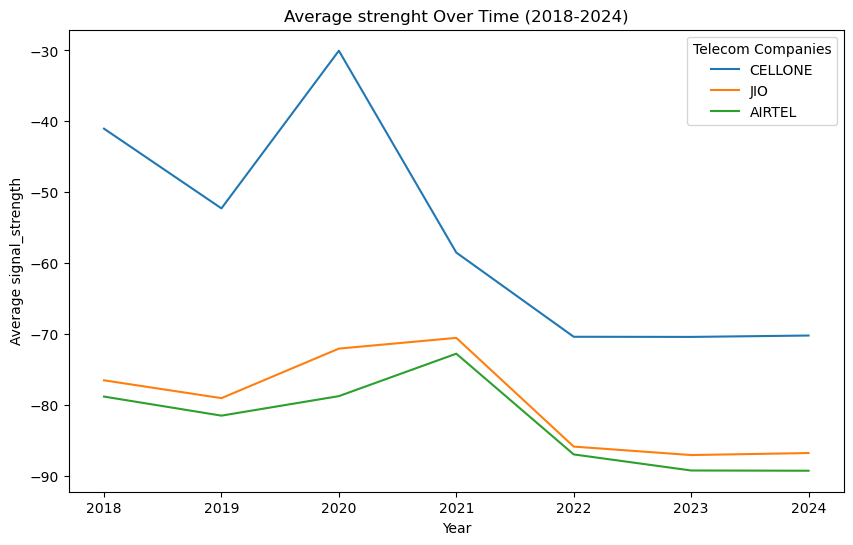

In [11]:
grouped_data = combined_all.groupby(['technology', 'year'])['signal_strength'].mean().unstack()

plt.figure(figsize=(10,6))

for company in combined_all['operator'].unique():
    companies = grouped_data.loc[company]
    
    plt.plot(companies.index, companies, label=company) 

plt.xlabel('Year')
plt.ylabel('Average signal_strength')
plt.title('Average strenght Over Time (2018-2024)')

plt.legend(title='Telecom Companies')

plt.show()

#### RESULT: Based on the above analysis, In rajasthan jio has shown significant improvement in network speed, with 2023 being its peak year where airtel is showing good useful result. In strength analysis, Cellone demonstrates stronger signal strength overall. Both Airtel and Jio maintain usable signal strength, making them competitive in terms of coverage. ####

### Q2: How has the performance of 4G as compared to 3G changed over the year in rajasthan? ###

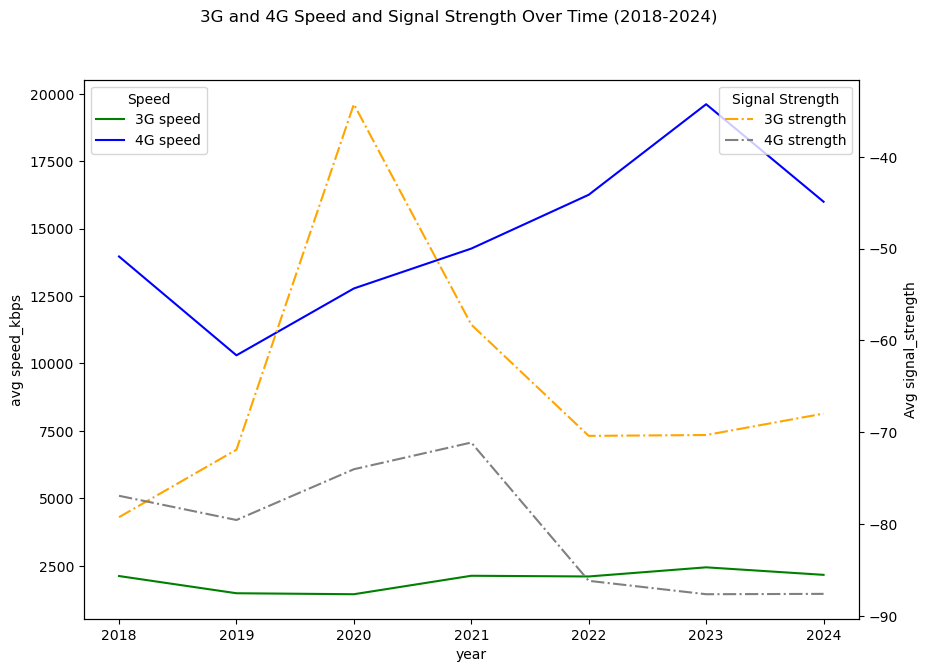

In [24]:
grouped_speed = combined_all.groupby(['technology', 'year'])['speed_kbps'].mean().unstack()
grouped_strength = combined_all.groupby(['technology','year'])['signal_strength'].mean().unstack()

fig, ax1 = plt.subplots(figsize=(10,7))

colors = {'3G_speed':'green','4G_speed':'blue','3G_strength':'orange','4G_strength':'grey'}

ax1.set_xlabel('year')
ax1.set_ylabel('avg speed_kbps', color='black')
ax1.plot(grouped_speed.columns, grouped_speed.loc['3G'], label= '3G speed', color=colors['3G_speed'], linestyle='-')
ax1.plot(grouped_speed.columns, grouped_speed.loc['4G'], label= '4G speed', color=colors['4G_speed'], linestyle='-')
ax1.tick_params(axis='y', labelcolor='black')


ax2 = ax1.twinx()  
ax2.set_ylabel('Avg signal_strength', color='black')
ax2.plot(grouped_strength.columns, grouped_strength.loc['3G'], label= '3G strength', color=colors['3G_strength'], linestyle='-.')
ax2.plot(grouped_strength.columns, grouped_strength.loc['4G'], label= '4G strength', color=colors['4G_strength'], linestyle='-.')
ax2.tick_params(axis='y', labelcolor='black')


fig.suptitle('3G and 4G Speed and Signal Strength Over Time (2018-2024)')

ax1.legend(loc='upper left', title='Speed')
ax2.legend(loc='upper right', title='Signal Strength')


plt.show()

#### Result: From the above analysis, I found that when network speeds are higher, the signal strength tends to be weaker. This could be due to higher network traffic in Rajasthan, where many people are using high-speed (4G) connections at the same time, causing congestion. This might explain why in 2023, we saw good speeds but weaker signal strength. Additionally, while 4G has much better speed compared to 3G, its signal strength is often lower, which shows an inverse relationship between speed and signal strength. ####  

### Q3: Are there any significant difference between download and upload speed(kbps) for each company? ###

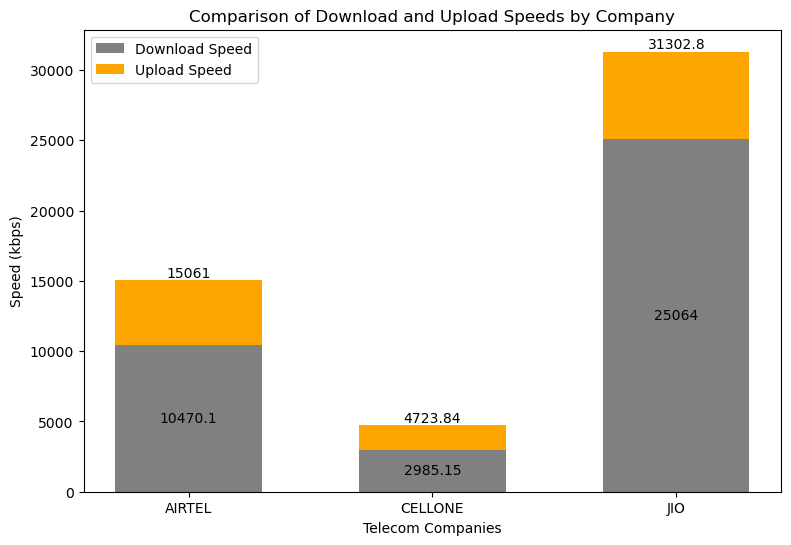

In [14]:
grouped_data = combined_all.groupby(['operator', 'download'])['speed_kbps'].mean().unstack()

download_speeds = grouped_data['download'] 
upload_speeds = grouped_data['upload']      

companies = download_speeds.index

width = 0.6  

fig, ax = plt.subplots(figsize=(9, 6))

bottom = np.zeros(len(companies))

p1 = ax.bar(companies, download_speeds, width, label='Download Speed', color='grey', bottom=bottom)

bottom += download_speeds

p2 = ax.bar(companies, upload_speeds, width, label='Upload Speed', color='orange', bottom=bottom)


ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='edge')


ax.set_title('Comparison of Download and Upload Speeds by Company')
ax.set_ylabel('Speed (kbps)')
ax.set_xlabel('Telecom Companies')


ax.legend()


plt.show()

#### Result: From the above analysis, it is evident that Jio likely has a large user base, supported by its superior download and upload speeds. This suggests that Jio has a well-structured network infrastructure in Rajasthan, capable of delivering high-speed internet with strong signal strength. Additionally, Jio's combination of competitive data packs and reliable performance makes it a market leader in the region.On the other hand, Airtel offers decent speeds but falls short compared to Jio, indicating room for improvement to compete with Jio's network capabilities. Cellone, with its significantly lower download and upload speeds, clearly needs to invest in network upgrades to enhance its service quality and compete effectively with other providers. #### 

### Q4: Are there any seasonal variations in network speed or signal strength? Do certain months see better or worse performance? ###

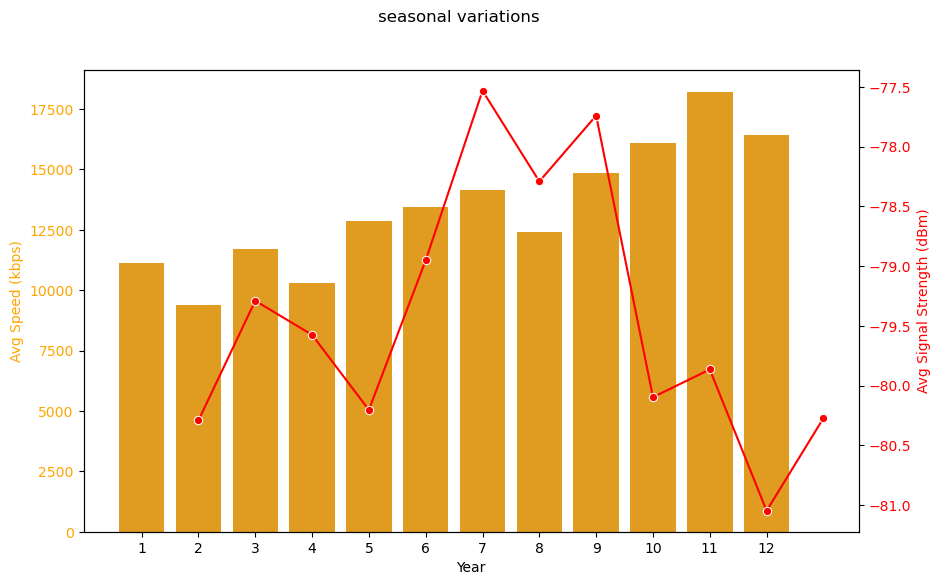

In [15]:
grouped_speed = combined_all.groupby(['year','month'])['speed_kbps'].mean().unstack()
grouped_strength = combined_all.groupby(['year','month'])['signal_strength'].mean().unstack()

fig, ax1 = plt.subplots(figsize=(10,6))

sns.barplot(x=grouped_speed.columns, y=grouped_speed.mean(), color='orange', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Speed (kbps)', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

ax2 = ax1.twinx() 

sns.lineplot(x=grouped_strength.columns, y=grouped_strength.mean(), color='red', marker='o', ax=ax2)
ax2.set_ylabel('Avg Signal Strength (dBm)', color='red')
ax2.tick_params(axis='y', labelcolor='red')


fig.suptitle('seasonal variations')


plt.show()

#### Result: From the analysis, we can see that in Rajasthan, between 2018 and 2024, September shows a clear drop in signal strength. This might be due to the start of the festive season, with more people using the internet for online shopping and other activities, causing the network to slow down.In November, although the internet speed is high, the signal strength remains weak. This could be because the festivals continue, leading to heavy network usage but still managing to maintain good speeds.In December, there’s an unusual pattern where speed and signal strength are opposite. This could be due to the holiday season, when internet traffic is high, putting extra pressure on the network and causing these changes in speed and signal quality.  ####  

# CONCLUSION : # 

### The overall analysis indicates that in Rajasthan, Jio has a strong user base and a well-developed infrastructure. Jio not only delivers excellent network speeds but also maintains average signal strength. On the other hand, Airtel has a moderate user base and provides good speeds in the region, though not as strong as Jio , for a user airtel will not be a bad choice. Cellone, however, requires significant improvement in both network infrastructure and service quality to compete effectively. ###

### references : data.gov.in for the data , as a help guide google and chatgpt. ###